In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

    1.Loading train and test data.

In [4]:
df_train = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')

In [5]:
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [7]:
print('Train Dataset shape ---> ',df_train.shape)
print('Test Dataset shape ---> ',df_test.shape)

Train Dataset shape --->  (103904, 25)
Test Dataset shape --->  (25976, 25)


    2:Listing column names.

In [8]:
count = 0
for train_col_names in df_train.columns:
    for test_col_names in df_test.columns:
        if test_col_names == train_col_names:
            print(train_col_names)
            count += 1
print('\nTotal number of columns in each train and test is :',count) 

Unnamed: 0
id
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction

Total number of columns in each train and test is : 25


    3.Remove unwanted columns from train and test data.

In [9]:
df_train.drop(['Unnamed: 0','id'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0','id'],axis=1,inplace=True)

if 'Unnamed: 0' not in df_train.columns and 'id' not in df_train.columns : 
    if 'Unnamed: 0' not in df_test and 'id' not in df_test:
        print('Columns deleted')

print('\nNumber of columns in train dataset after deleting columns is : ',len(df_train.columns))
print('Number of columns in test dataset after deleting columns is : ',len(df_test.columns))

print('\nTrain Dataset shape ---> ',df_train.shape)
print('Test Dataset shape ---> ',df_test.shape)

Columns deleted

Number of columns in train dataset after deleting columns is :  23
Number of columns in test dataset after deleting columns is :  23

Train Dataset shape --->  (103904, 23)
Test Dataset shape --->  (25976, 23)


    4.Separating numerical and categorical columns. 

In [10]:
numerical_features  = [feature  for feature in df_train.columns   if df_train[feature].dtype != 'O']
categorical_features = [feature  for feature in df_train.columns   if df_train[feature].dtype == 'O']

In [11]:
print(numerical_features,'\n')
print(categorical_features)

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] 

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


    5.Data Visualization for numerical features. 

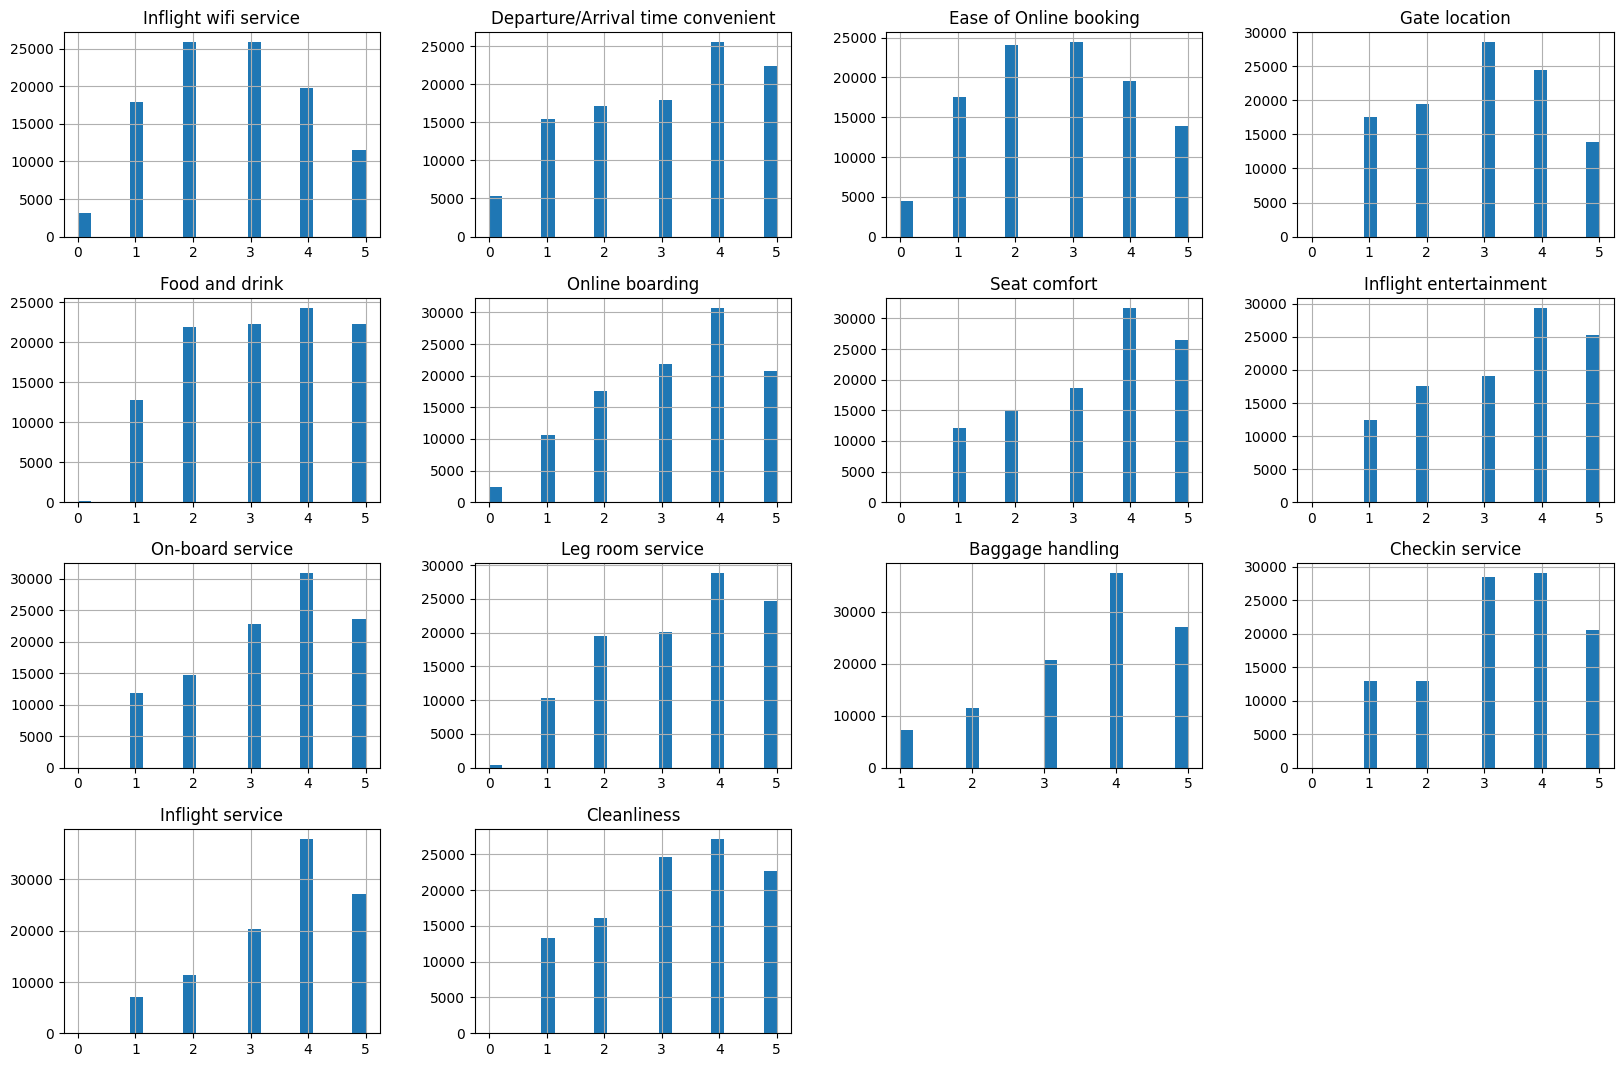

In [12]:
''' We can see high and low customer ratings out of 5 for each service. '''

n_col = []
for col in numerical_features[2:-2]:
    n_col.append(col)

df_train.hist(n_col[:],bins=22,figsize=(20,13))
plt.show()    

    6.Data Visualization for categorical features.

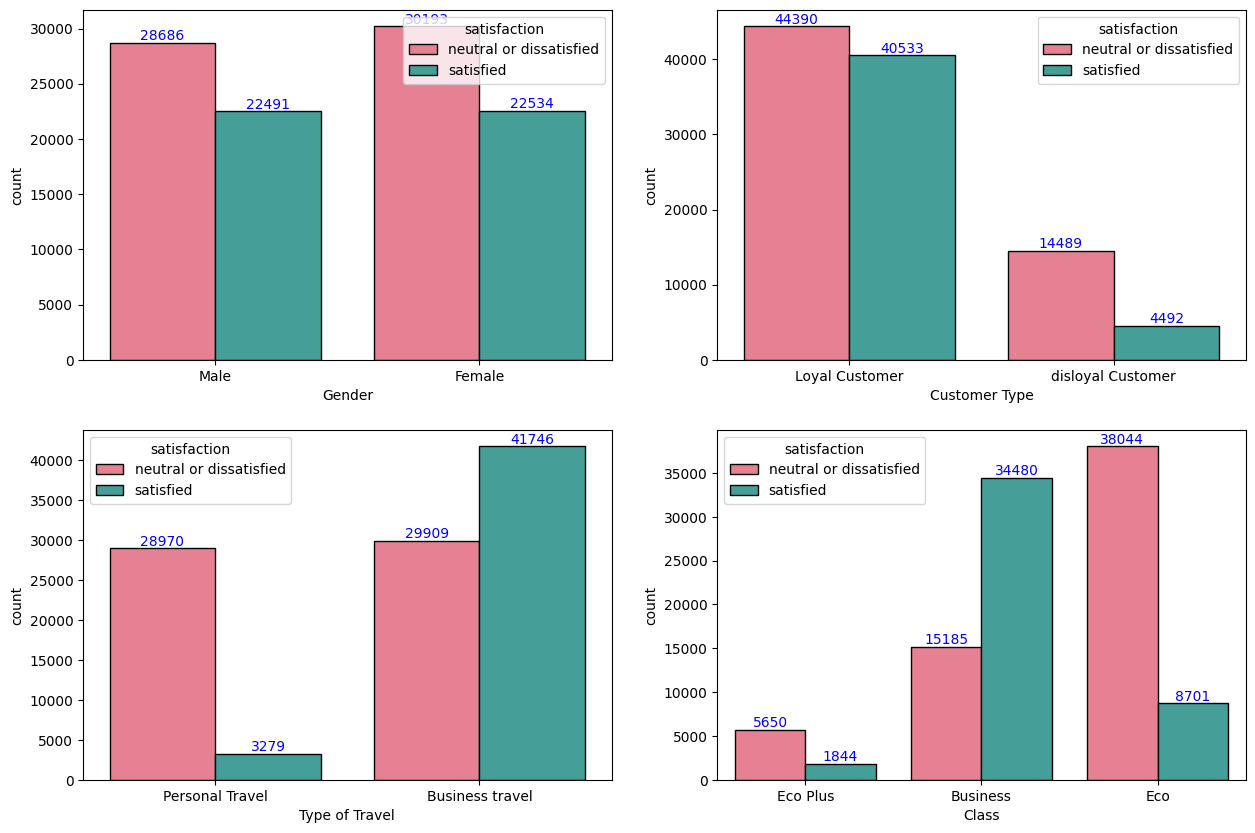

In [13]:
''' Visualization of customer satisfied or dissatisfied based on categorical data. '''

fig , ax = plt.subplots(2,2,figsize=(15,10))
ax = ax.flatten()


for i,colm in enumerate(categorical_features[:-1]):
  c_plot=sns.countplot(x=colm, hue='satisfaction',palette='husl',ax=ax[i],data=df_train,lw=1,ec='black')
  for j in c_plot.containers:
    c_plot.bar_label(j,color='blue')


plt.show()

    7.Checking for NaN

In [14]:
df_train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [15]:
df_test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

    8.Missing value handling.

In [16]:
for data in [df_train,df_test]:
    values = data['Arrival Delay in Minutes'].mode()[0]
    data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(values)

if df_train['Arrival Delay in Minutes'].isna().sum() == df_test['Arrival Delay in Minutes'].isna().sum():
    print('Successfully handled the missing values.')

Successfully handled the missing values.


    9.Checking correlation.

In [17]:
''' Before correlation categorical datas should be label encoded.  '''

copy_train = df_train.copy()

l1,l2,l3,l4,l5 = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
label_col = {'Gender':l1,'Customer Type':l2,'Type of Travel':l3,'Class':l4,'satisfaction':l5}
c=0

for df in [copy_train]:
    for j in label_col.keys():
        df[j]=label_col[j].fit_transform(df[j])
        print(list(zip(label_col[j].classes_,label_col[j].transform(label_col[j].classes_))),'\n')
    c += 1  

[('Female', 0), ('Male', 1)] 

[('Loyal Customer', 0), ('disloyal Customer', 1)] 

[('Business travel', 0), ('Personal Travel', 1)] 

[('Business', 0), ('Eco', 1), ('Eco Plus', 2)] 

[('neutral or dissatisfied', 0), ('satisfied', 1)] 



<Axes: >

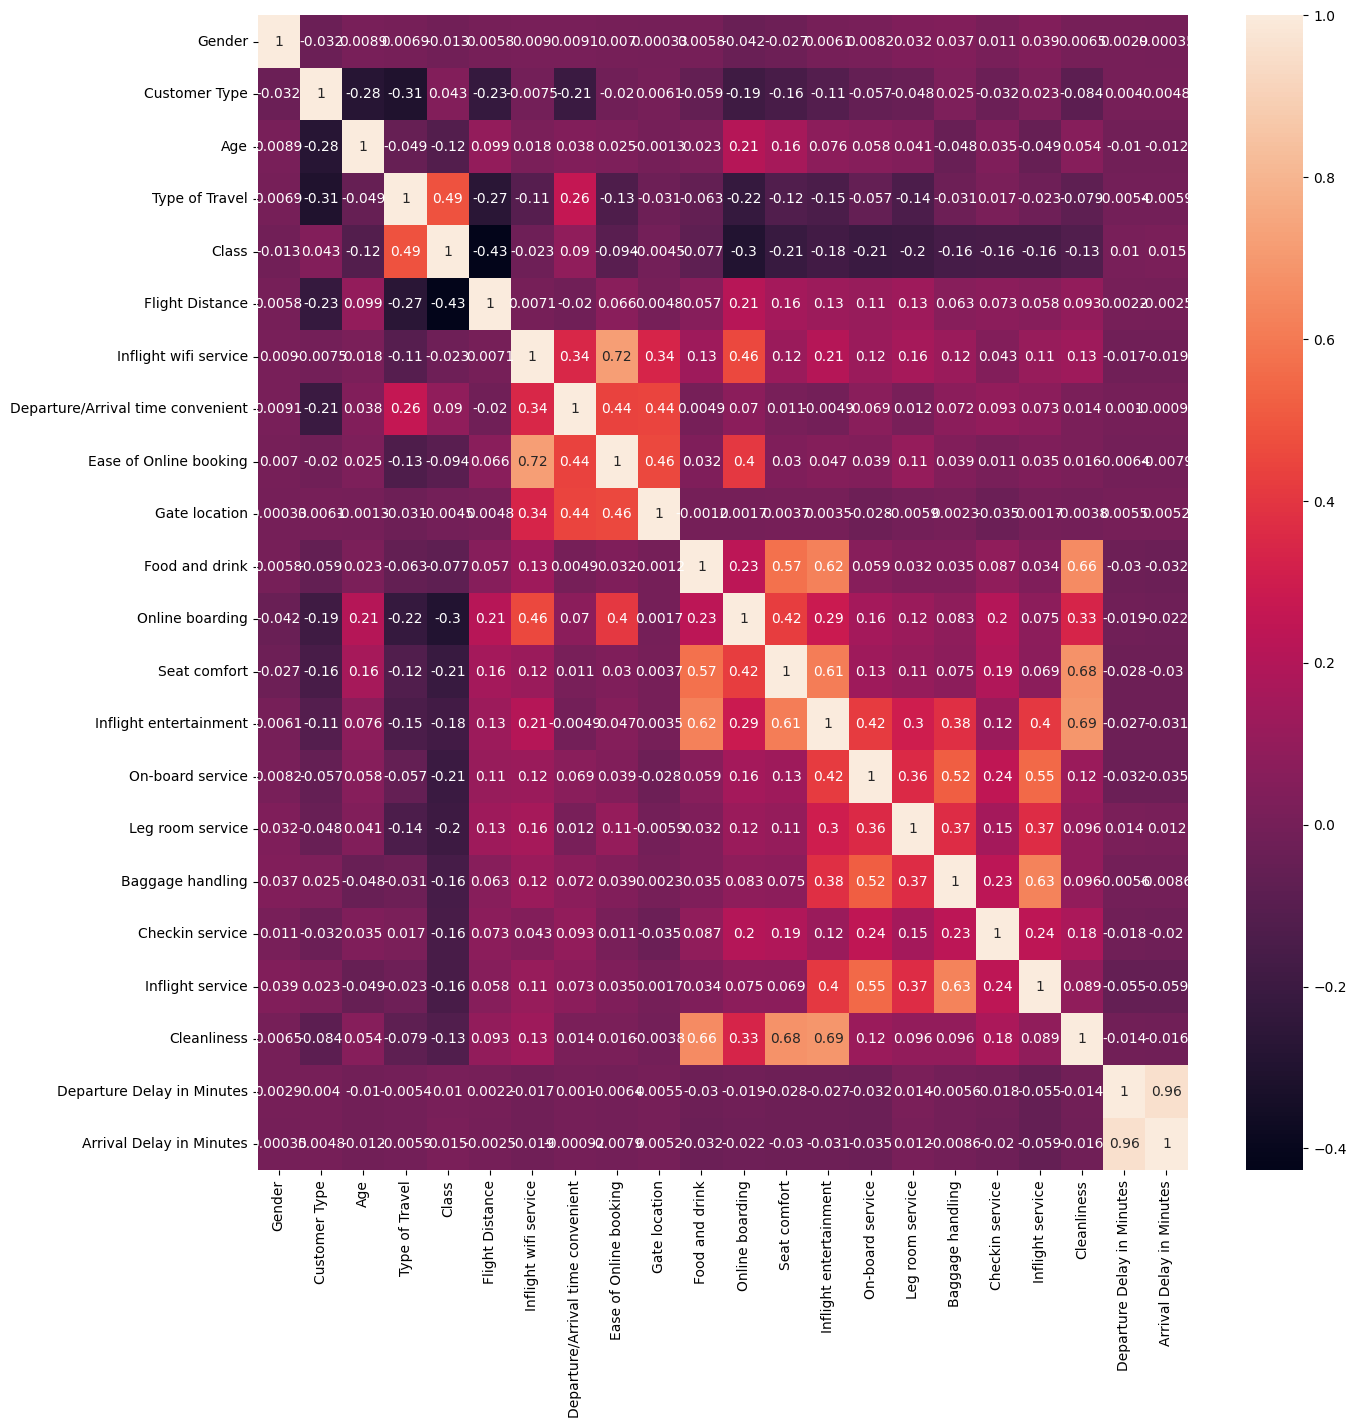

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(copy_train.iloc[:,:-1].corr(),annot=True)

    10.Droping columns which have high correlation with others.

In [19]:
df_train.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)
df_test.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)

if 'Arrival Delay in Minutes' not in df_train.columns:
    if 'Arrival Delay in Minutes' not in df_test.columns:
        print(f'"Arrival Delay in Minutes" column is deleted from both train and test dataset.')

"Arrival Delay in Minutes" column is deleted from both train and test dataset.


    11.Checking for outliers

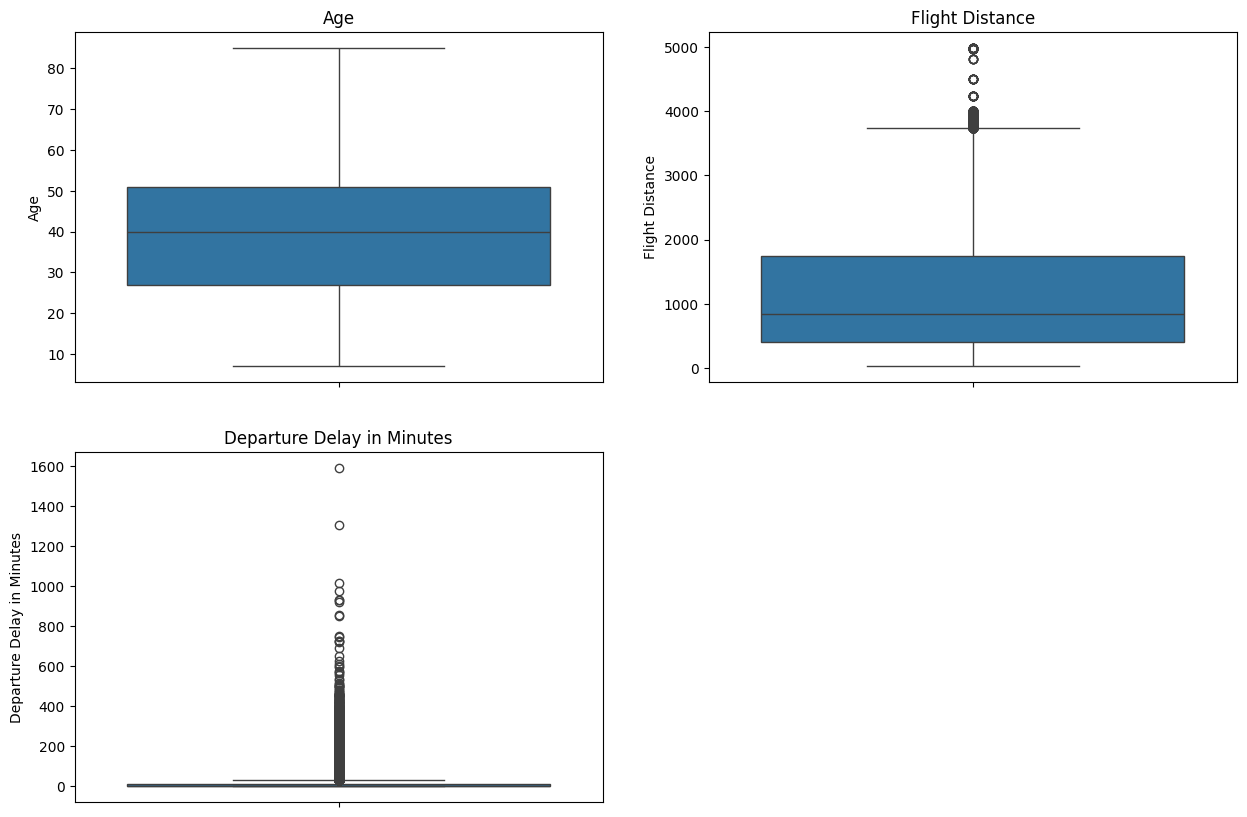

In [20]:
''' Checking for outliers '''

out_columns = ['Age','Flight Distance','Departure Delay in Minutes']

plt.figure(figsize=(15,10))

c = 1

for col in out_columns:
    plt.subplot(2,2,c)
    sns.boxplot(y=col,data=df_train)
    plt.title(col)
    c = c+1

In [21]:
df_train[['Flight Distance','Departure Delay in Minutes']].describe()

,Flight Distance,Departure Delay in Minutes
count,103904.000000,103904.000000
mean,1189.448375,14.815618
std,997.147281,38.230901
min,31.000000,0.000000
25%,414.000000,0.000000
50%,843.000000,0.000000
75%,1743.000000,12.000000
max,4983.000000,1592.000000


    12.Grouping distance into (Short,Medium,Long)

In [22]:
def new_dis_name(t):
    if type(t) is int or type(t) is float:
        if t <=500:
            return 'Short'
        elif t > 500 and t<= 2000:
            return 'Medium' 
        else:
            return 'Long'
        

for tm_train in df_train['Flight Distance']:
    df_train['Flight Distance'] = df_train['Flight Distance'].replace(tm_train,new_dis_name(tm_train))

for tm_test in df_test['Flight Distance']:
    df_test['Flight Distance'] = df_test['Flight Distance'].replace(tm_test,new_dis_name(tm_test))


In [23]:
df_train['Flight Distance'].value_counts()

Flight Distance
Medium    50170
Short     32321
Long      21413
Name: count, dtype: int64

In [24]:
df_test['Flight Distance'].value_counts()

Flight Distance
Medium    12567
Short      7955
Long       5454
Name: count, dtype: int64

    13.Grouping numeric values to categorical values (No,Minor,Moderate,Significant,Major). Column renamed.

In [25]:
def new_name(t):
    if type(t) is int or type(t) is float:
        if t == 0:
            return 'No'
        elif t >= 1 and t<= 15:
            return 'Minor'
        elif t > 15 and t <= 60:
            return 'Moderate' 
        elif t > 60 and t <= 120:
            return 'Significant' 
        else:
            return 'Major'
        

for tm_train in df_train['Departure Delay in Minutes']:
    df_train['Departure Delay in Minutes'] = df_train['Departure Delay in Minutes'].replace(tm_train,new_name(tm_train))

for tm_test in df_test['Departure Delay in Minutes']:
    df_test['Departure Delay in Minutes'] = df_test['Departure Delay in Minutes'].replace(tm_test,new_name(tm_test))

df_train = df_train.rename(columns={'Departure Delay in Minutes' : 'Departure Delay'})  
df_test = df_test.rename(columns={'Departure Delay in Minutes' : 'Departure Delay'})          


In [27]:
df_train['Departure Delay'].value_counts()

Departure Delay
No             58668
Minor          22184
Moderate       15813
Significant     4699
Major           2540
Name: count, dtype: int64

In [28]:
df_test['Departure Delay'].value_counts()

Departure Delay
No             14688
Minor           5603
Moderate        3949
Significant     1183
Major            553
Name: count, dtype: int64

    14.Visualization of column 'Departure Delay' and 'Flight Distance'.

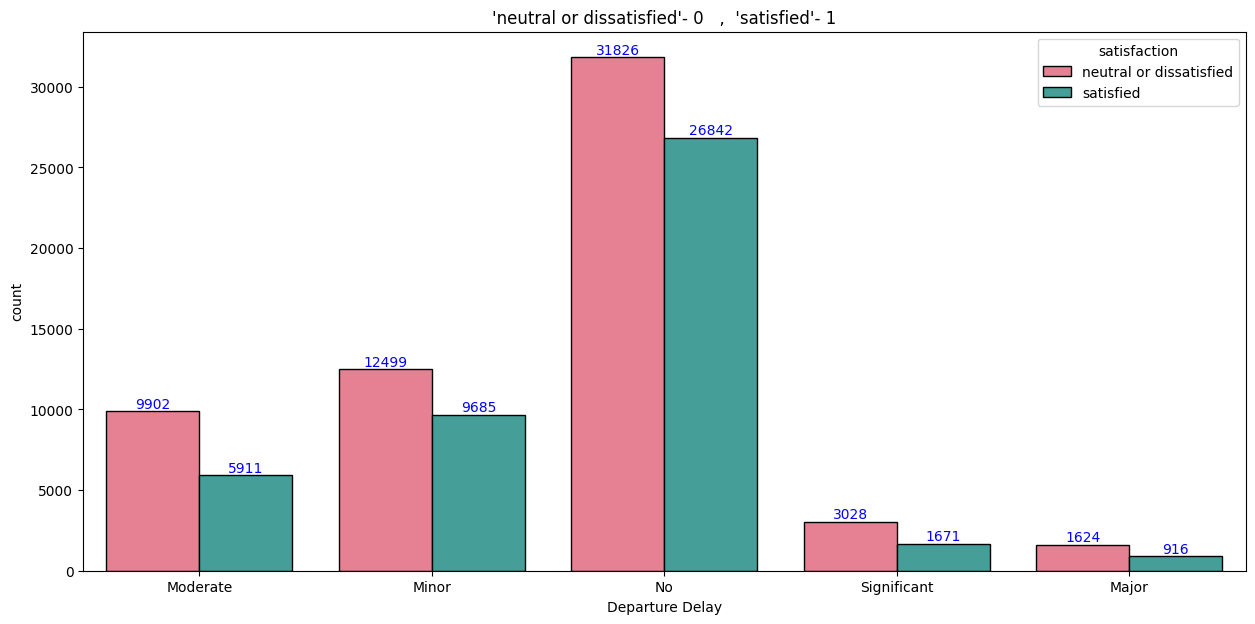

In [29]:
fig , ax = plt.subplots(figsize=(15,7))

for i,colm in enumerate(['Departure Delay']):
  c_plot=sns.countplot(x=colm, hue='satisfaction',palette='husl',ax=ax,data=df_train,lw=1,ec='black')
  for j in c_plot.containers:
    c_plot.bar_label(j,color='blue')

plt.title("'neutral or dissatisfied'- 0   ,  'satisfied'- 1")
plt.show() 

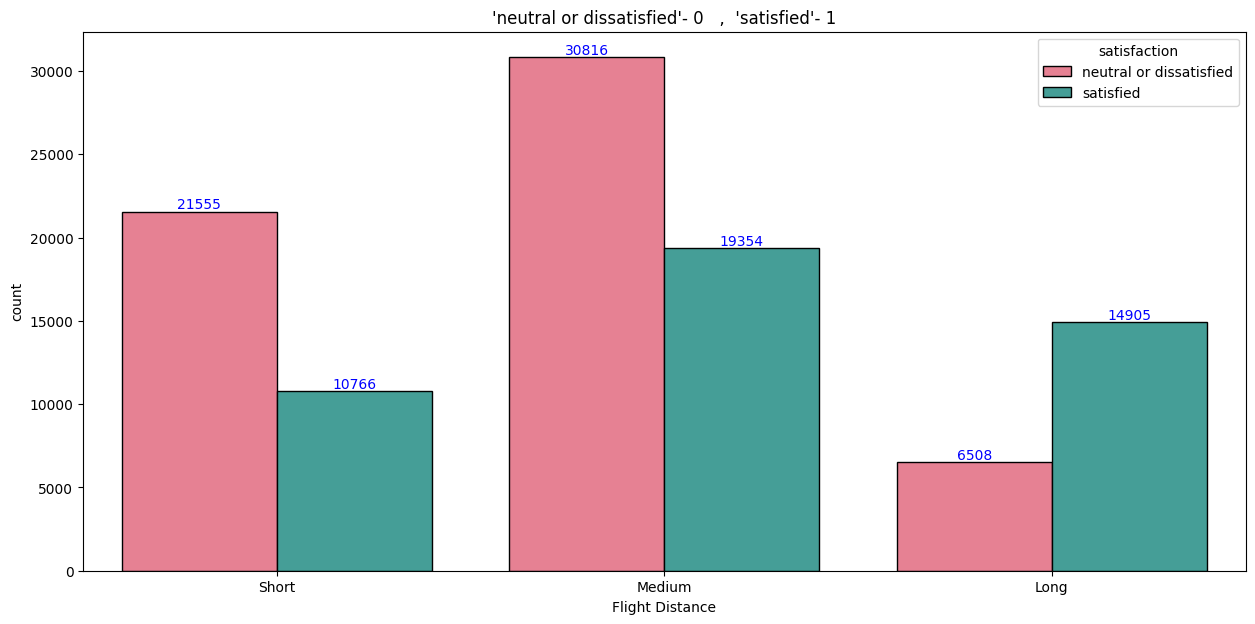

In [30]:
fig , ax = plt.subplots(figsize=(15,7))

for i,colm in enumerate(['Flight Distance']):
  c_plot=sns.countplot(x=colm, hue='satisfaction',palette='husl',ax=ax,data=df_train,lw=1,ec='black')
  for j in c_plot.containers:
    c_plot.bar_label(j,color='blue')

plt.title("'neutral or dissatisfied'- 0   ,  'satisfied'- 1")
plt.show() 

    15.Delete duplicate rows.

In [31]:
df_train.drop_duplicates(inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,Short,3,4,3,1,...,5,5,4,3,4,4,5,5,Moderate,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,Short,3,2,3,3,...,1,1,1,5,3,1,4,1,Minor,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,Medium,2,2,2,2,...,5,5,4,3,4,4,4,5,No,satisfied
3,Female,Loyal Customer,25,Business travel,Business,Medium,2,5,5,5,...,2,2,2,5,3,1,4,2,Minor,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,Short,3,3,3,3,...,5,3,3,4,4,3,3,3,No,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103733,Female,disloyal Customer,23,Business travel,Eco,Short,2,1,2,3,...,2,2,3,1,4,2,3,2,Minor,neutral or dissatisfied
103734,Male,Loyal Customer,49,Business travel,Business,Long,4,4,4,4,...,5,5,5,5,5,5,5,4,No,satisfied
103735,Male,disloyal Customer,30,Business travel,Business,Medium,1,1,1,3,...,5,4,3,2,4,5,5,4,Minor,neutral or dissatisfied
103736,Female,disloyal Customer,22,Business travel,Eco,Medium,1,1,1,5,...,1,1,4,5,1,5,4,1,No,neutral or dissatisfied


    16.Checking whether dataset is balanced or imbalanced.

satisfaction
neutral or dissatisfied    58871
satisfied                  44867
Name: count, dtype: int64 



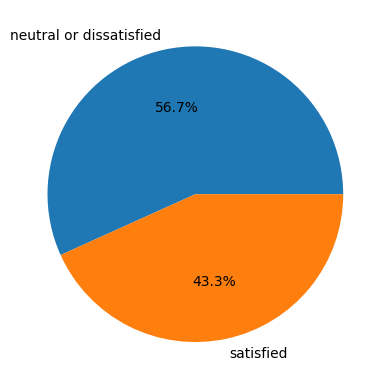

In [32]:
print(df_train['satisfaction'].value_counts(),'\n')

plt.pie(df_train['satisfaction'].value_counts(),labels=['neutral or dissatisfied','satisfied'],autopct='%1.1f%%')
# plt.title('0 - No,Heart Attack Risk | 1 - Yes,Heart Attack Risk ')
plt.show()

    17.Label Encoder.

In [33]:
l1,l2,l3,l4,l5,l6,l7 = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()
label_col = {'Gender':l1,'Customer Type':l2,'Type of Travel':l3,'Class':l4,'satisfaction':l5,'Departure Delay':l6,'Flight Distance':l7}
c=0

data_names = ['Train.csv','Test.csv']

for df in [df_train,df_test]:
    print(data_names[c])
    for j in label_col.keys():
        df[j]=label_col[j].fit_transform(df[j])
        print(list(zip(label_col[j].classes_,label_col[j].transform(label_col[j].classes_))),'\n')
    c += 1  

Train.csv
[('Female', 0), ('Male', 1)] 

[('Loyal Customer', 0), ('disloyal Customer', 1)] 

[('Business travel', 0), ('Personal Travel', 1)] 

[('Business', 0), ('Eco', 1), ('Eco Plus', 2)] 

[('neutral or dissatisfied', 0), ('satisfied', 1)] 

[('Major', 0), ('Minor', 1), ('Moderate', 2), ('No', 3), ('Significant', 4)] 

[('Long', 0), ('Medium', 1), ('Short', 2)] 

Test.csv
[('Female', 0), ('Male', 1)] 

[('Loyal Customer', 0), ('disloyal Customer', 1)] 

[('Business travel', 0), ('Personal Travel', 1)] 

[('Business', 0), ('Eco', 1), ('Eco Plus', 2)] 

[('neutral or dissatisfied', 0), ('satisfied', 1)] 

[('Major', 0), ('Minor', 1), ('Moderate', 2), ('No', 3), ('Significant', 4)] 

[('Long', 0), ('Medium', 1), ('Short', 2)] 



In [34]:
df_balance_train = df_train.copy()


    18.Creating X_train , y_train , X_test , y_test.

In [35]:
X_tr = df_train.drop(['satisfaction'],axis=1)
y_train = df_train['satisfaction']

X_te = df_test.drop(['satisfaction'],axis=1)
y_test = df_test['satisfaction']

In [36]:
print('Shape of Train --> ',X_tr.shape,y_train.shape)
print('Shape of Test --> ',X_te.shape,y_test.shape)

Shape of Train -->  (103738, 21) (103738,)
Shape of Test -->  (25976, 21) (25976,)


In [37]:
# Scaling using MinMax Scaler

minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_tr)
X_test = minmax_scaler.fit_transform(X_te)

    19.Finding Best Model

In [38]:
def train_predict(obj):
    obj.fit(X_train,y_train)
    y_pred = obj.predict(X_test)

    print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    return obj

KNN with default neighbors (i.e n=5).
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14573
           1       0.95      0.87      0.91     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.92      0.92     25976
weighted avg       0.93      0.93      0.93     25976



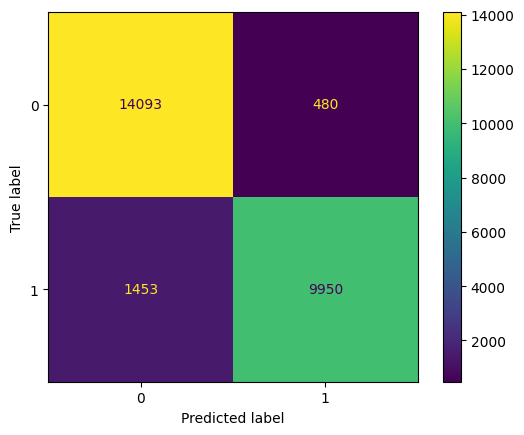

In [39]:
print('KNN with default neighbors (i.e n=5).')

knn = KNeighborsClassifier()
knn_model = train_predict(knn)

Support Vector Classifier with default arguments ie kernel = rbf
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.93      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



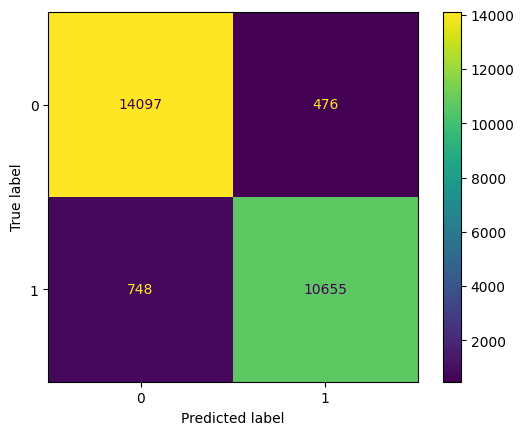

In [40]:
print('Support Vector Classifier with default arguments ie kernel = rbf')

sv = SVC()
sv_model = train_predict(sv)

Support Vector Classifier with kernal = linear
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     14573
           1       0.89      0.81      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



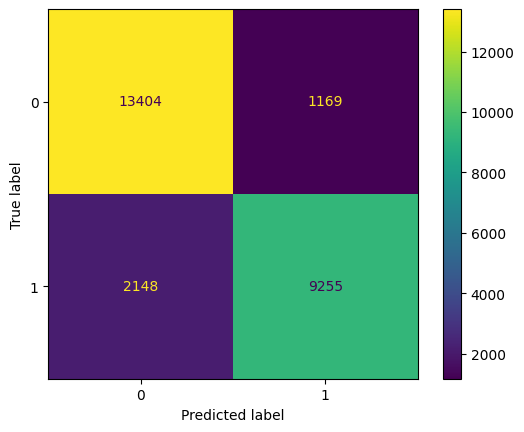

In [41]:
print('Support Vector Classifier with kernal = linear')

sv_linear = SVC(kernel='linear')
sv_linear_model = train_predict(sv_linear)

Support Vector Classifier with kernal = poly
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.93      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



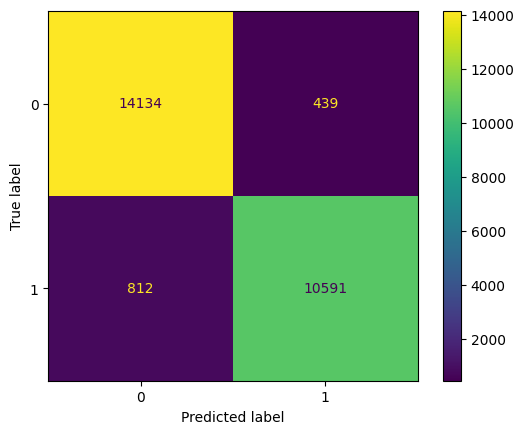

In [42]:
print('Support Vector Classifier with kernal = poly')

sv_poly = SVC(kernel='poly')
sv_poly_model = train_predict(sv_poly)

Support Vector Classifier with kernal = poly with degree 4
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.97      0.93      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



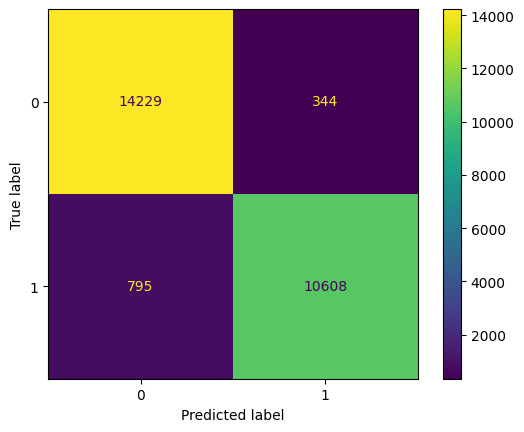

In [43]:
print('Support Vector Classifier with kernal = poly with degree 4')

sv_poly_degree4 = SVC(kernel='poly',degree=4)
sv_poly_model = train_predict(sv_poly_degree4)

Naive Bayes using GaussianNB
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     14573
           1       0.88      0.81      0.84     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.86      0.86     25976
weighted avg       0.87      0.87      0.87     25976



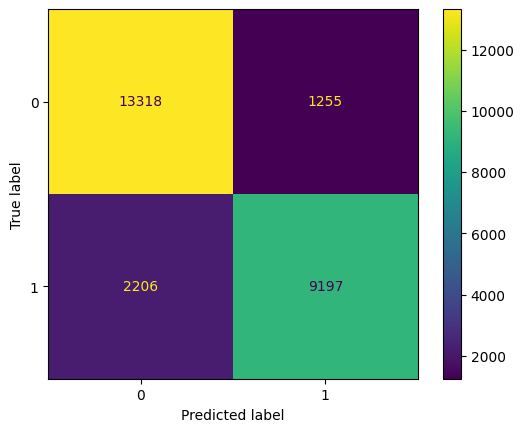

In [44]:
print('Naive Bayes using GaussianNB')

G_NB = GaussianNB()
G_nb_model = train_predict(G_NB)

Naive Bayes using MultinomialNB
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     14573
           1       0.79      0.77      0.78     11403

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



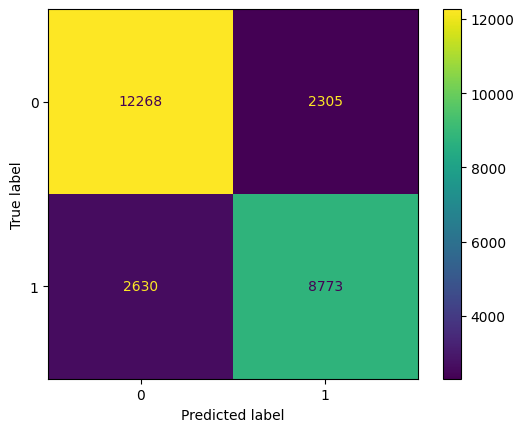

In [45]:
print('Naive Bayes using MultinomialNB')

M_NB = MultinomialNB()
M_nb_model = train_predict(M_NB)

Naive Bayes using BernoulliNB
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     14573
           1       0.73      0.78      0.76     11403

    accuracy                           0.78     25976
   macro avg       0.78      0.78      0.78     25976
weighted avg       0.78      0.78      0.78     25976



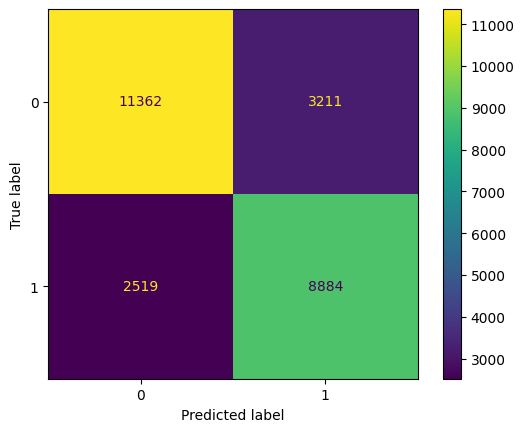

In [46]:
print('Naive Bayes using BernoulliNB')

B_NB = BernoulliNB()
B_nb_model = train_predict(B_NB)

Decision Tree using criterion = gini.
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     14573
           1       0.91      0.93      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



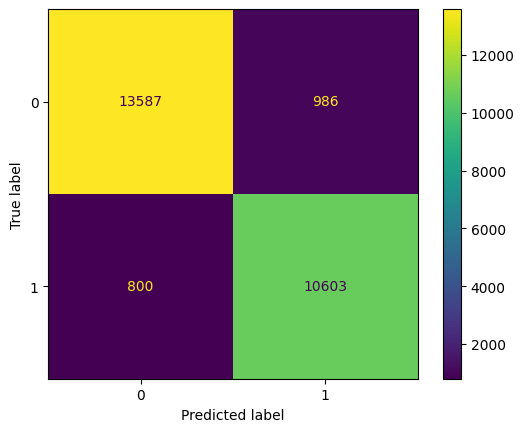

In [47]:
print('Decision Tree using criterion = gini.')

d_tree_gini = DecisionTreeClassifier(criterion='gini')
d_gini = train_predict(d_tree_gini)

Decision Tree using criterion = entropy.
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     14573
           1       0.91      0.93      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



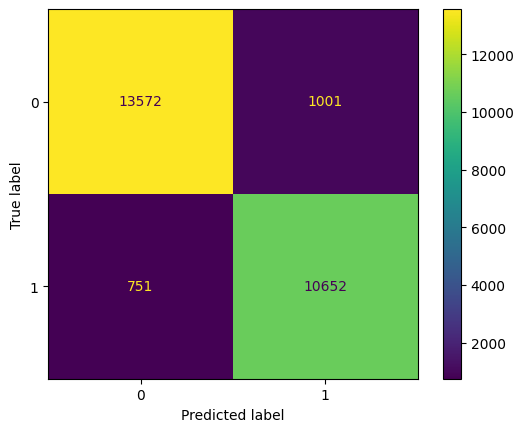

In [48]:
print('Decision Tree using criterion = entropy.')

d_tree_entropy = DecisionTreeClassifier(criterion='entropy')
d_entropy = train_predict(d_tree_entropy)

Random Forest Classifier.
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



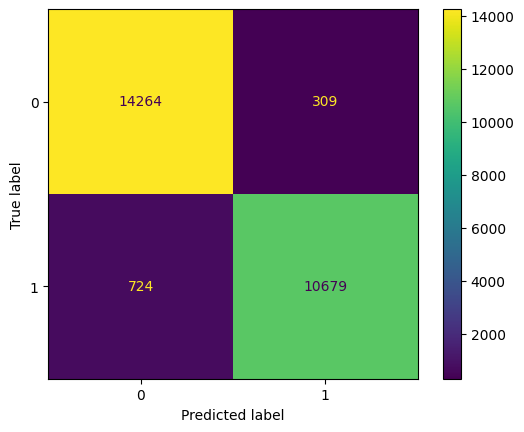

In [49]:
print('Random Forest Classifier.')

rf = RandomForestClassifier(random_state=42)
rf_model = train_predict(rf)

Ada Boost Classifier.
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14573
           1       0.91      0.91      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



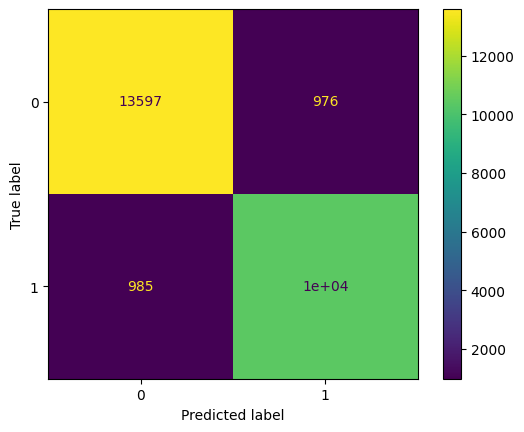

In [50]:
print('Ada Boost Classifier.')

ada = AdaBoostClassifier(random_state=1)
ada_model = train_predict(ada)

XGBoost Classifier.
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14573
           1       0.98      0.93      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



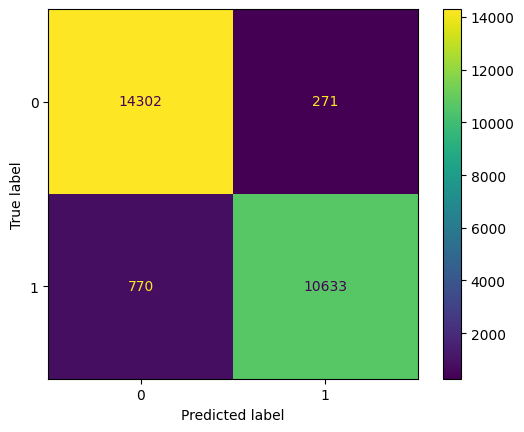

In [51]:
print('XGBoost Classifier.')

xgb = XGBClassifier()
xgb_model = train_predict(xgb)

    20.Saving XGBoost Model 

In [70]:
import pickle
filename = 'best_model.sav'
pickle.dump(xgb_model,open(filename,'wb'))

    21.Saving scaler.

In [71]:
pickle.dump(minmax_scaler,open('MinMax_scaler.sav','wb'))

In [72]:
''' 
The End...
'''

' \nThe End...\n'